In [1]:
import scipy.stats as stats
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

np.random.seed(25)

In [2]:
n = 100

w = 0.25

mu1 = 1
mu2 = 4

sigma = 0.5

x1 = stats.norm.rvs(loc=mu1, scale=sigma, size=30)
x2 = stats.norm.rvs(loc=mu2, scale=sigma, size=70)

x = np.concatenate([x1,x2])

(array([ 1.,  3.,  3.,  6.,  4.,  3.,  4.,  1.,  3.,  1.,  1.,  0.,  5.,
         3.,  8., 16., 19.,  9.,  5.,  5.]),
 array([-0.29724369, -0.03192129,  0.2334011 ,  0.4987235 ,  0.76404589,
         1.02936829,  1.29469068,  1.56001308,  1.82533547,  2.09065787,
         2.35598026,  2.62130266,  2.88662505,  3.15194745,  3.41726984,
         3.68259224,  3.94791463,  4.21323703,  4.47855942,  4.74388182,
         5.00920421]),
 <BarContainer object of 20 artists>)

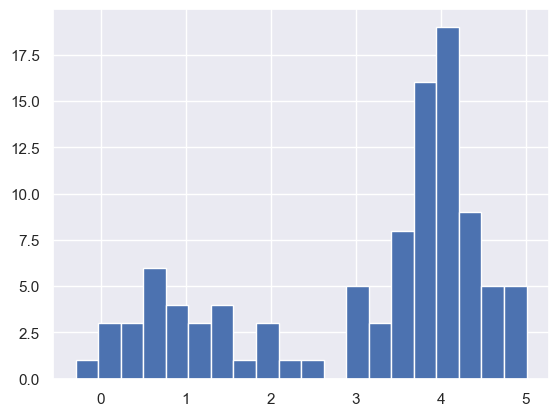

In [3]:
plt.hist(x, bins=int(len(x) / 5))

2.3439888674247827e-06
mu:    [0.95147962 3.94923438]
sigma: 0.547758242786299


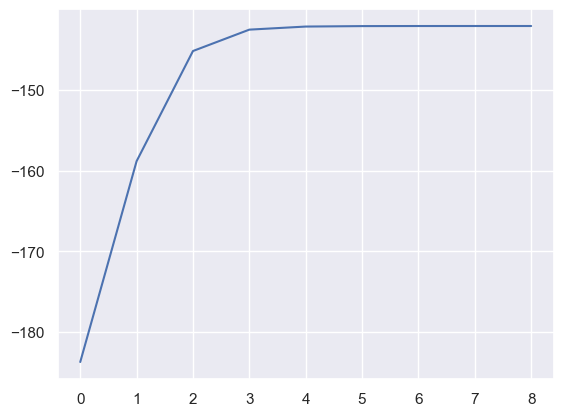

In [4]:
K = 2
w_0 = 0.5

w = w_0
means_0 = np.array([0.5,2.5])
sigma_0 = np.array([1])

mu = means_0
sigma = sigma_0

QQ = []
QQ_last = -1e5

eps = 1e-5

for i in range(1000):
    # E step
    p_Z = np.zeros((len(x), K))

    p_Z[:,0] = np.log(w) + stats.norm.logpdf(x, loc=mu[0], scale=sigma)
    p_Z[:,1] = np.log(1-w) + stats.norm.logpdf(x, loc=mu[1], scale=sigma)

    p_Z = np.exp(p_Z - np.max(p_Z, axis=1).reshape(-1,1)) / np.sum(np.exp(p_Z - np.max(p_Z, axis=1).reshape(-1,1)), axis=1).reshape(-1,1)

    # M step
    w = np.mean(p_Z[:,0])

    mu = np.sum(p_Z * x.reshape(-1,1), axis=0) / np.sum(p_Z, axis=0)

    sigma = 0

    sigma = np.sqrt(
        np.sum(
            np.identity(2) * np.dot(p_Z.T, np.power(x.reshape(-1,1) - mu, 2))) / np.sum(p_Z)
    )

    # Convergence Check
    QQ_current = 0
    QQ_current += np.dot(p_Z[:,0] , (np.log(w) + stats.norm.logpdf(x, loc=mu[0], scale=sigma)))
    QQ_current += np.dot(p_Z[:,1] , (np.log(1-w) + stats.norm.logpdf(x, loc=mu[1], scale=sigma)))

    epsilon = np.abs(QQ_current - QQ_last) / np.abs(QQ_current)

    QQ_last = QQ_current
    QQ.append(QQ_last)

    if epsilon < eps:
        print(epsilon)
        break

plt.plot(QQ) 
print(f"mu:    {mu}")
print(f"sigma: {sigma}")

In [5]:
def f(x:np.ndarray, w=w, mu=mu, sigma=sigma):
    y = w * stats.norm.pdf(x, loc=mu[0], scale=sigma) + (1-w) * stats.norm.pdf(x, loc=mu[1], scale=sigma)
    return y

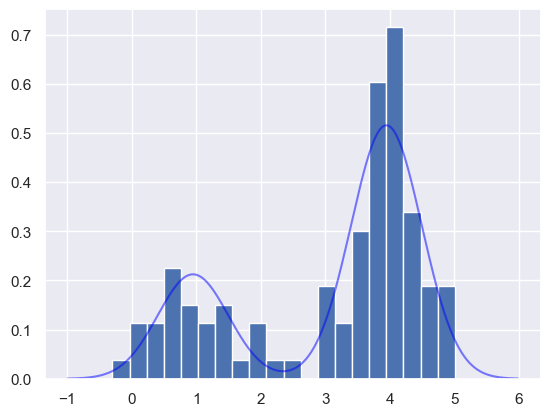

In [6]:
x_plot = np.arange(-1, 6, 0.01)

fig, ax = plt.subplots()
ax.hist(x, density=True, bins=int(len(x)/5))
ax.plot(x_plot, f(x_plot), color="blue", alpha=0.5)